Evolve DS Challenge | Alexandra Treml | 2021-12-19

Summary of data and project goal: Create a model to determine whether a customer will stop using the booking service. This is a classification problem - churn or no churn. 

In [102]:
#Import useful packages for EDA
import pandas as pd
import numpy as np 
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

%matplotlib inline

In [103]:
#Load data 
churn = pd.read_csv('./listing_churn_data.csv')

# EDA

In [52]:
#making sure I have the right data set and taking a first look at what kinds of data are in the dataset, 
#how many columns, and any obvious null values, column name changes, ect. 
churn.head()

,avg_interactions_with_support,owner_blocks_per_month,avg_income_last_12,avg_income_last_6,avg_review_score,number_of_reviews,bookings_per_month,weekends_booked_per_month,avg_nightly_rate,avg_length_of_stay,churn
0,0.617163,9.577551,3814.028288,5426.263674,2.057209,15.310482,6.807388,2.000974,112.447254,2.251096,0
1,0.806455,8.798974,4206.420776,4655.139391,2.688184,12.099859,11.036336,1.745107,162.364418,1.963245,0
2,0.782139,7.734795,4552.123937,3851.009952,2.607130,12.348177,9.001582,1.961279,362.219228,2.206438,0
3,0.718405,8.326465,2678.914523,3593.631638,2.394683,13.332082,6.156692,2.155884,284.710399,2.425369,0
4,0.449931,9.654206,3152.906971,4352.544162,1.499769,17.709455,5.898279,2.715650,219.075644,3.055107,0


Let's take a look just to see in the first 50 records the general frequency of churn, and get a better insight into the values of the data. 

In [20]:
churn.head(50)

,avg_interactions_with_support,owner_blocks_per_month,avg_income_last_12,avg_income_last_6,avg_review_score,number_of_reviews,bookings_per_month,weekends_booked_per_month,avg_nightly_rate,avg_length_of_stay,churn
0,0.617163,9.577551,3814.028288,5426.263674,2.057209,15.310482,6.807388,2.000974,112.447254,2.251096,0
1,0.806455,8.798974,4206.420776,4655.139391,2.688184,12.099859,11.036336,1.745107,162.364418,1.963245,0
2,0.782139,7.734795,4552.123937,3851.009952,2.607130,12.348177,9.001582,1.961279,362.219228,2.206438,0
3,0.718405,8.326465,2678.914523,3593.631638,2.394683,13.332082,6.156692,2.155884,284.710399,2.425369,0
4,0.449931,9.654206,3152.906971,4352.544162,1.499769,17.709455,5.898279,2.715650,219.075644,3.055107,0
5,0.595287,6.827002,2775.434725,4757.051900,1.984291,15.460768,8.177066,2.277102,186.949844,2.561740,0
6,0.632078,7.420711,3813.938242,6498.951057,2.106926,14.904690,6.936406,2.151498,389.785429,2.420436,0
7,0.356480,7.329031,4366.822875,4199.757603,1.188266,19.250344,5.561922,2.891281,216.007901,3.252691,0
8,0.574525,6.531218,5133.559712,4112.535304,1.915084,15.703791,4.941698,2.427050,265.254693,2.730431,0
9,0.519418,6.822856,4627.573697,3039.521641,1.731394,16.668009,8.105015,2.468546,274.129349,2.777115,0


In [15]:
#Take inventory of the columns I have and what type of data there is to work with
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125000 entries, 0 to 124999
Data columns (total 11 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   avg_interactions_with_support  125000 non-null  float64
 1   owner_blocks_per_month         125000 non-null  float64
 2   avg_income_last_12             125000 non-null  float64
 3   avg_income_last_6              125000 non-null  float64
 4   avg_review_score               125000 non-null  float64
 5   number_of_reviews              125000 non-null  float64
 6   bookings_per_month             125000 non-null  float64
 7   weekends_booked_per_month      125000 non-null  float64
 8   avg_nightly_rate               125000 non-null  float64
 9   avg_length_of_stay             125000 non-null  float64
 10  churn                          125000 non-null  int64  
dtypes: float64(10), int64(1)
memory usage: 10.5 MB


In [18]:
#Get an idea of how big the dataset is
len(churn)

125000

In [19]:
#Determine how many null values are in the dataset
churn.isnull().sum()
#Great, no null values!

avg_interactions_with_support    0
owner_blocks_per_month           0
avg_income_last_12               0
avg_income_last_6                0
avg_review_score                 0
number_of_reviews                0
bookings_per_month               0
weekends_booked_per_month        0
avg_nightly_rate                 0
avg_length_of_stay               0
churn                            0
dtype: int64

In [22]:
#checking to see if any records are duplicated - there are no duplications.
churn.duplicated().sum()

0

In [21]:
#print out the summary statistics for churn data 
churn.describe(include = 'all')

,avg_interactions_with_support,owner_blocks_per_month,avg_income_last_12,avg_income_last_6,avg_review_score,number_of_reviews,bookings_per_month,weekends_booked_per_month,avg_nightly_rate,avg_length_of_stay,churn
count,1.250000e+05,125000.000000,1.250000e+05,125000.000000,1.250000e+05,125000.000000,125000.000000,125000.000000,125000.000000,125000.000000,125000.000000
mean,6.780759e-01,7.725324,3.963240e+03,4599.630038,2.260253e+00,14.106742,7.870451,2.109165,242.812677,2.372810,0.066976
std,1.478541e-01,1.687156,9.671399e+02,1022.538725,4.928470e-01,2.426508,1.692926,0.342966,48.439414,0.385836,0.249981
min,1.665335e-16,0.000000,1.776357e-12,0.000000,5.551115e-16,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.787001e-01,6.587806,3.313676e+03,3908.434213,1.929000e+00,12.547839,6.724655,1.881241,210.278615,2.116396,0.000000
50%,6.755519e-01,7.730746,3.964778e+03,4602.625155,2.251840e+00,14.159391,7.868453,2.110030,242.795664,2.373784,0.000000
75%,7.742619e-01,8.860805,4.616419e+03,5286.370759,2.580873e+00,15.732120,9.011352,2.337891,275.736857,2.630127,0.000000
max,1.500000e+00,15.000000,8.000000e+03,9500.000000,5.000000e+00,25.000000,15.000000,4.000000,450.000000,4.500000,1.000000


If the data included names of owners, or other proprietary information, I may consider dropping those columns for ethical and secruity reasons before I do any modeling. I do not currently see the need to drop any columns. 

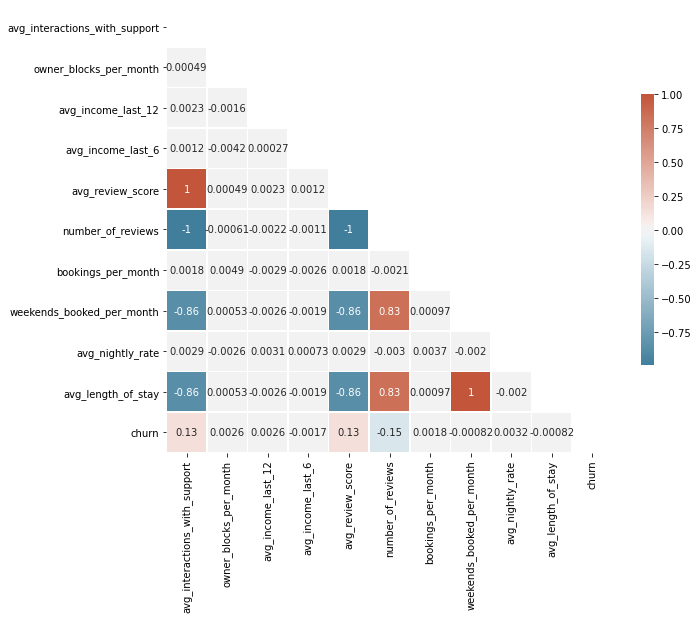

In [28]:
#make a correlation plot to determine important variables 
f, ax = plt.subplots(figsize=(10, 10))
mat = churn.corr('pearson')
mask = np.triu(np.ones_like(mat, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(mat, mask=mask, cmap=cmap, vmax=1, center=0, annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

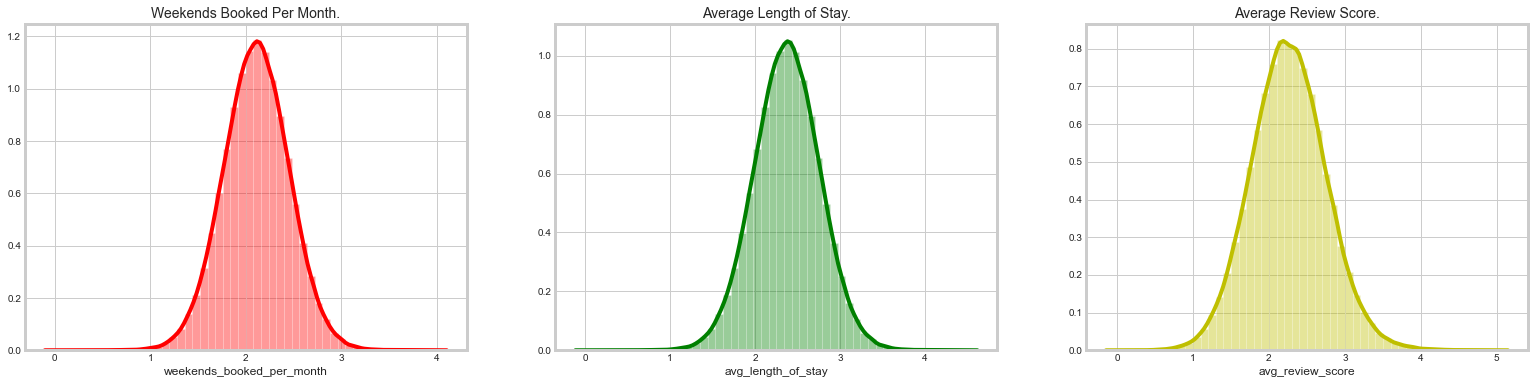

In [106]:
f, ax = plt.subplots(1,3, figsize=(24, 6))

sns.distplot(churn['weekends_booked_per_month'], color = 'r',ax = ax[0])
ax[0].set_title('Weekends Booked Per Month.', fontsize=14)

sns.distplot(churn['avg_length_of_stay'], color = 'g', ax=ax[1])
ax[1].set_title('Average Length of Stay.', fontsize=14)

sns.distplot(churn['avg_review_score'], color = 'y' ,ax = ax[2])
ax[2].set_title('Average Review Score.', fontsize=14)

plt.show()

Are these really this normally distributed???

# Modeling


In [64]:
churn.head()

,avg_interactions_with_support,owner_blocks_per_month,avg_income_last_12,avg_income_last_6,avg_review_score,number_of_reviews,bookings_per_month,weekends_booked_per_month,avg_nightly_rate,avg_length_of_stay,churn
0,0.617163,9.577551,3814.028288,5426.263674,2.057209,15.310482,6.807388,2.000974,112.447254,2.251096,0
1,0.806455,8.798974,4206.420776,4655.139391,2.688184,12.099859,11.036336,1.745107,162.364418,1.963245,0
2,0.782139,7.734795,4552.123937,3851.009952,2.607130,12.348177,9.001582,1.961279,362.219228,2.206438,0
3,0.718405,8.326465,2678.914523,3593.631638,2.394683,13.332082,6.156692,2.155884,284.710399,2.425369,0
4,0.449931,9.654206,3152.906971,4352.544162,1.499769,17.709455,5.898279,2.715650,219.075644,3.055107,0


First I'm going to do a baseline model with a Logistic Regression model and a confusion matrix 

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

X= churn.iloc[:, :-1]
y = churn.iloc[:,-1]

model = LogisticRegression()

#Fit the model
model.fit(X, y)
y_pred = model.predict(X)

mylist = []
# Confusion Matrix
cm = confusion_matrix(y, y_pred)
# accuracy score
acc_logreg_base = accuracy_score(y, y_pred)

mylist.append(acc_logreg_base)
print(cm)
print(acc_logreg_base)

[[116565     63]
 [  7366   1006]]
0.940568


C:\Users\611810\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


There's a convergence warning... meaning I should increase the number of iterations. Picking feature columns will help this as well. 
Now I'm going to use an ExtraTreesClassifer to pick the best feature columns.

[0.10863825 0.08511241 0.08460717 0.08459497 0.11039812 0.12353574
 0.08470673 0.11621885 0.08516524 0.11702253]


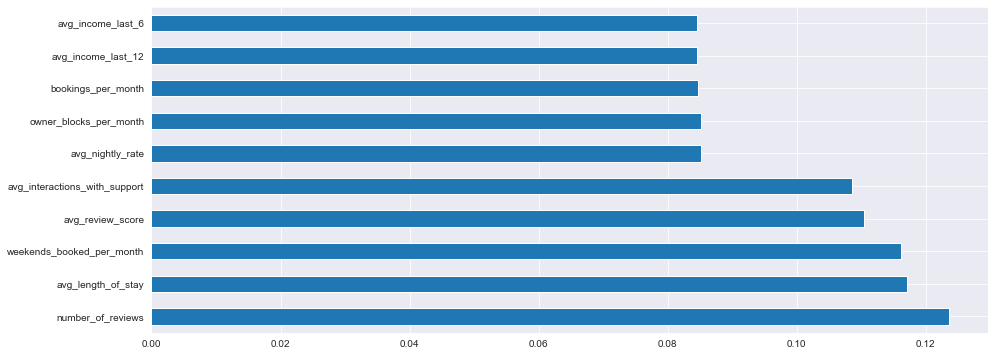

In [53]:
# Feature Selection
#Use ExtraTreesClassifier to pick best feature columns

plt.rcParams['figure.figsize']=15,6 
sns.set_style("darkgrid")

X = churn.iloc[:, :-1]
y = churn.iloc[:,-1]

from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [65]:
churn = churn.drop(['avg_income_last_6', 'avg_income_last_12', 'bookings_per_month', 'owner_blocks_per_month', 'avg_nightly_rate',],axis=1)

In [66]:
churn.head()

,avg_interactions_with_support,avg_review_score,number_of_reviews,weekends_booked_per_month,avg_length_of_stay,churn
0,0.617163,2.057209,15.310482,2.000974,2.251096,0
1,0.806455,2.688184,12.099859,1.745107,1.963245,0
2,0.782139,2.607130,12.348177,1.961279,2.206438,0
3,0.718405,2.394683,13.332082,2.155884,2.425369,0
4,0.449931,1.499769,17.709455,2.715650,3.055107,0


Set the labels

In [68]:
X = churn.drop('churn', axis=1)
y = churn.churn

Split the training and testing datasets

In [75]:
#now I can split the data into train and test
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

print(X_train)
print(y_test)

        avg_interactions_with_support  avg_review_score  number_of_reviews  \
69612                        0.678531          2.261770          14.069838   
116448                       0.859175          2.863918          11.276301   
41775                        0.654424          2.181413          14.405720   
111282                       0.700903          2.336342          13.881878   
52201                        0.696762          2.322541          14.004133   
...                               ...               ...                ...   
86827                        0.715620          2.385400          13.555704   
53193                        0.657279          2.190928          14.425380   
83164                        0.904832          3.016106          10.552287   
18101                        0.834013          2.780042          11.675902   
5185                         0.633288          2.110960          14.751146   

        weekends_booked_per_month  avg_length_of_stay  
69612  

In [78]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Logistic Regression Model

In [79]:
# Create a LOGREG model
#Making Confusion Matrix and calculating accuracy score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

model = LogisticRegression()

#Fit the model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mylist = []
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
# accuracy score
acc_logreg = accuracy_score(y_test, y_pred)

mylist.append(acc_logreg)
print(cm)
print(acc_logreg)

[[34978    22]
 [ 2195   305]]
0.94088


KNN

In [88]:
# Calculate TRAINING ERROR and TESTING ERROR for K=1 through 100.

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

k_range = list(range(1, 101))
training_error = []
testing_error = []

# Find test accuracy for all values of K between 1 and 100.
for k in k_range:

    # Instantiate the model with the current K value.
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Calculate training error (error = 1 - accuracy).
    y_pred_class = knn.predict(X)
    training_accuracy = metrics.accuracy_score(y, y_pred_class)
    training_error.append(1 - training_accuracy)
    
    # Calculate testing error.
    y_pred_class = knn.predict(X_test)
    testing_accuracy = metrics.accuracy_score(y_test, y_pred_class)
    testing_error.append(1 - testing_accuracy)

In [89]:
# Allow plots to appear in the notebook.
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [90]:
# Create a DataFrame of K, training error, and testing error.
column_dict = {'K': k_range, 'training error':training_error, 'testing error':testing_error}
df1 = pd.DataFrame(column_dict).set_index('K').sort_index(ascending=False)
print(df1.tail())

   training error  testing error
K                               
5        0.066024       0.055920
4        0.066136       0.055413
3        0.066728       0.062320
2        0.066144       0.058720
1        0.066704       0.103707


In [91]:
# Find the minimum testing error and the associated K value.
df1.sort_values('testing error').head(10)

,training error,testing error
K,,
18,0.066200,0.054347
21,0.066184,0.054347
24,0.066248,0.054373
13,0.066056,0.054373
19,0.066176,0.054373
29,0.066264,0.054400
15,0.066112,0.054400
16,0.066144,0.054400
20,0.066200,0.054400


In [93]:
#making sure it's the same lowest testing error
min(list(zip(testing_error, k_range)))

(0.054346666666666654, 18)

In [94]:
# Training the K Nearest Neighbor Classifier on the Training set

classifier = KNeighborsClassifier(n_neighbors=8)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [95]:
y_pred_class = classifier.predict(X_test)
print((metrics.accuracy_score(y_test,y_pred_class)))

0.9453333333333334


In [97]:
# Making the confusion matrix and calculating accuracy score

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc_knn = accuracy_score(y_test, y_pred)
mylist.append(acc_knn)
print(cm)
print(acc_knn)

[[34751   249]
 [ 1967   533]]
0.9409066666666667


Random Forest Classification 

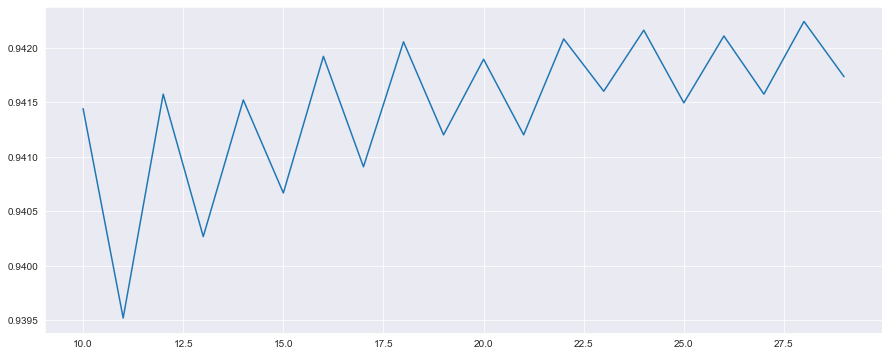

In [81]:
#random forest classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
list1 = []
for estimators in range(10,30):
    classifier = RandomForestClassifier(n_estimators = estimators, random_state=0, criterion='entropy')
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    list1.append(accuracy_score(y_test,y_pred))
#print(mylist)
plt.plot(list(range(10,30)), list1)
plt.show()

In [83]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 17, criterion='entropy', random_state=0)
classifier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=17, random_state=0)

In [85]:
# Predicting the test set results

y_pred = classifier.predict(X_test)
print(y_pred)

[0 0 0 ... 0 0 0]


In [87]:
# Making the confusion matrix and calculating the accuracy score

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc_randomforest = accuracy_score(y_test, y_pred)
mylist.append(acc_randomforest)
print(cm)
print(acc_randomforest)

[[34751   249]
 [ 1967   533]]
0.9409066666666667


In [99]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 
              'Random Forest'],
    'Score': [acc_knn, acc_logreg, 
              acc_randomforest]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,KNN,0.940907
2,Random Forest,0.940907
1,Logistic Regression,0.940880


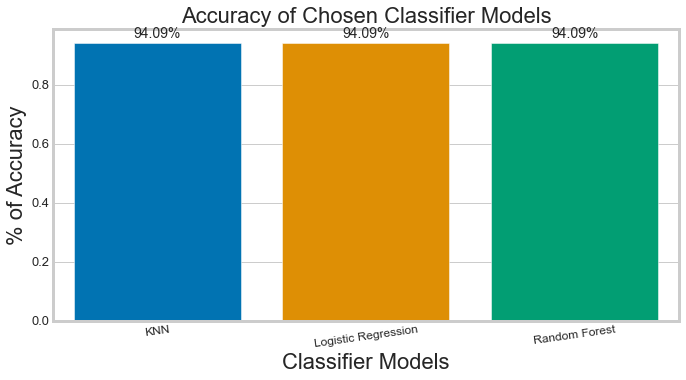

In [100]:
#plot the accuracy of each of the models I chose 
plt.rcParams['figure.figsize']=10,5
sns.set_style("whitegrid")
ax = sns.barplot(x=models.Model, y=models.Score, palette = "colorblind", saturation =1.5)
plt.xlabel("Classifier Models", fontsize = 22 )
plt.ylabel("% of Accuracy", fontsize = 22)
plt.title("Accuracy of Chosen Classifier Models", fontsize = 22)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'medium')
plt.show()

All three models are very close... According to the table, the KNN model is the most accurate. This is the model that I would use. Now I can visualize the training data set and the test data set to show that the model has more accurately classified the data accurately in the test data set.

In [ ]:
#Visualizing the training set result  
from matplotlib.colors import ListedColormap  
x_set, y_set = x_train, y_train  
x1, x2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
mtp.contourf(x1, x2, classifier.predict(nm.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('purple','green' )))  
mtp.xlim(x1.min(), x1.max())  
mtp.ylim(x2.min(), x2.max())  
for i, j in enumerate(nm.unique(y_set)):  
    mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('purple', 'green'))(i), label = j)  
mtp.title('Logistic Regression (Training set)')  
mtp.xlabel('Age')  
mtp.ylabel('Estimated Salary')  
mtp.legend()  
mtp.show()  

In [ ]:
#Visulaizing the test set result  
from matplotlib.colors import ListedColormap  
x_set, y_set = x_test, y_test  
x1, x2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
mtp.contourf(x1, x2, classifier.predict(nm.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('purple','green' )))  
mtp.xlim(x1.min(), x1.max())  
mtp.ylim(x2.min(), x2.max())  
for i, j in enumerate(nm.unique(y_set)):  
    mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('purple', 'green'))(i), label = j)  
mtp.title('Logistic Regression (Test set)')  
mtp.xlabel('Age')  
mtp.ylabel('Estimated Salary')  
mtp.legend()  
mtp.show()  